# PPGI-PO-Simplex

Aluno: Victor José de Sousa Koehler

Matrícula: 20211023501



## Introdução

Neste trabalho é apresentado uma simplificada implementação do algoritmo Simplex Revisado (Duas Fases) como requisito da avaliação da disciplina de Pesquisa Operacional do Programa de Pós-Graduação em Informática (PPGI) da Universidade Federal da Paraíba (UFPB). Esta implementação possui teor puramente educativo e não deve ser seriamente utilizada em ambientes de produção. Ao final deste documento são apresentados alguns resultados de experimentos computacionais realizados com esta implementação utilizando um conjunto de instâncias de programas lineares bem conhecido da literatura, bem como uma comparação com o mesmo conjunto utilizando um resolvedor considerado estado-da-arte.

As referências deste trabalho incluem, além das notas das aulas, os seguintes materiais:


> ANTOLÍN CAMARENA, Omar. Math 340: Linear Programming. Disponível em: <https://www.matem.unam.mx/~omar/math340/>. Acesso em: 2 jun. 2022.

> LAVROV, Mikhail. Lecture 14: Duality and the Simplex Tableau. Disponível em: <https://faculty.math.illinois.edu/~mlavrov/docs/482-spring-2020/lecture14.pdf>. Acesso em: 2 jun. 2022.

> MACAMBIRA, Ana Flavia Uzeda dos Santos; MACULAN, Nelson; CABRAL, Lucídio dos Anjos Formiga; et al. Programação linear. [s.l.]: Editora UFPB, 2016.

### Dependências

- Eigen v3.4.0: Disponível em [https://eigen.tuxfamily.org](https://eigen.tuxfamily.org), deve ser extraído para `src/include/Eigen`.

## Estrutura do Código

A pasta `src/` abriga os arquivos com os códigos-fonte. Nela estão contidos, além das implementações, os seguintes *headers*:

- Variable.hpp:  Contém a classe *Variable*, que representa uma variável do problema.
- Expression.hpp:  Contém a classe *Expression*, que modela uma expressão matemática.
- Constraint.hpp:  Contém a classe *Constraint*, que herda de *Expression* e representa uma inequação matemática do problema (restrições).
- Objective.hpp:  Contém a classe *Objective*, que herda de *Expression* e representa a função objetivo do problema.
- Model.hpp:  Contém a classe *Model*, que armazena, encaixa e gerencia as classes descritas acima de forma a modelar completamente um Problema Linear.
- LPParser.hpp:  Contém classes e rotinas que permitem a importação de arquivos de extensão ".lp" para instâncias da classe *Model*.
- Xplex.hpp:  Contém a classe *Xplex*, que recebe um problema descrito em uma instância de *Model* e resolve-o através do método Simplex Revisado (Duas Fases).
- Clock.hpp: Contém estruturas auxiliares para cronometragem.
- global.hpp: Contém estruturas auxiliares frequentemente utilizadas.

Existem três maneiras possíveis de utilizar-se desta implementação de modo a descrever um determinado problema em uma instância da classe *Model*, e em seguida, resolvê-lo através de *Xplex*. A título de exemplo, a seguir são apresentados os métodos e, então, eles são utilizados para descrever o mesmo problema.

A primeira maneira consiste no uso direto e programático dos métodos e membros da classe *Model* (não recomendado):

<details><summary>Método I de modelagem de problemas:</summary>

```C++
//   Utilizando a API das classes Model e relacionadas diretamente através dos membros
void example_5_i() { // Snippet of main.cpp::141
    Xplex::Model m;
    auto x1 = *m.newVariable("x1");
    auto x2 = *m.newVariable("x2");
    auto c1 = Xplex::Constraint("c1", 4);
    auto c2 = Xplex::Constraint("c2", 12);
    auto c3 = Xplex::Constraint("c3", 18);
    c1.setVariableCoefficient(x1, 1);
    c2.setVariableCoefficient(x2, 2);
    c3.setVariableCoefficient(x1, 3);
    c3.setVariableCoefficient(x2, 2);
    m.add(c1);
    m.add(c2);
    m.add(c3);
    // m.objective() defaults to Maximization. To change it, you must multiply by -1
    // const auto Minim = Xplex::ObjectiveFunction::ObjectiveType::Minimization;
    // if (m.objective().getOriginalObjectiveType() == Minim) m.objective().multiplyBy(-1);
    m.objective().setVariableCoefficient(x1, 3);
    m.objective().setVariableCoefficient(x2, 5);

    Xplex::Xplex xplex(&m);
    xplex.solve();
}
```

</details>

A segunda consiste no uso programático de operadores sobrescritos sobre a classe *Expression* e derivados. Método recomendado caso o usuário opte por descrever os problemas de forma programática, isto é, usando a liguagem de programação (C++), devido a sua maior legibilidade e expressividade:

<details><summary>Método II de modelagem de problemas:</summary>

```C++
//   Utilizando a API sobrescrita das classes Expression e derivadas
void example_5_ii() { // Snippet of main_expressions.cpp::4
    Xplex::Model m;
    auto x1 = *m.newVariable("x1");
    auto x2 = *m.newVariable("x2");

    auto c1 =  1*x1        <= 4;
    auto c2 =         2*x2 <= 12;
    auto c3 =  3*x1 + 2*x2 <= 18;

    m.add(c1).add(c2).add(c3);
    m.objective() = Xplex::Maximize(3*x1 + 5*x2);
    m.build();

    Xplex::Xplex xplex(&m);
    xplex.solve();
}
```

</details>

Por fim, este trabalho implementa um interpretador para arquivos no formato ".lp" descrito em https://perso.ensta-paris.fr/~diam/ro/online/cplex/cplex1271/CPLEX/FileFormats/topics/LP.html através da classe `LPParserXplexModel`, e que pode ser invocado através da linha de comando: `./simplex path_to_file.pl`. Este é o método recomendado para leitura e descrição de problemas em arquivos:

<details><summary>Método III de modelagem de problemas:</summary>

```lp
\Utilizando arquivos .lp
\Contrabarra (\) são comentários}
\ENCODING=ISO-8859-1
\Problem name: example5

Maximize
 OBJ: 3.00 x1  +  5.00 x2
Subject To
 c1:   1.00 x1             <= 4
 c2:            +  2.00 x2 <= 12
 c3:   3.00 x1  +  2.00 x2 <= 18
End
```

</details>

## Considerações adicionais sobre implementação, corretude e escopo

Tratando-se de uma implementação puramente educacional, como mencionado anteriormente, alguns *bugs*, causados principalmente por instabilidades numéricas, estão conhecidamente presentes e costumam manifestar-se em problemas relativamente grandes e de longa duração de resolução. Assim sendo, a enumeração *Status* (declarada em *Xplex::Xplex::Status*) contém os seguintes valores que descrevem o retorno da execução do algoritmo e aparecem de forma recorrente nas tabelas contendo os resultados dos experimentos realizados nas próximas seções:

- UNSOLVED: Estado inicial da classe Xplex, quando o método `solve` ainda não foi invocado (ou falhou de forma catastrófica).
- OPTIMAL: Retornado quando o algoritmo encontra a solução "ótima", de acordo com a regra de escolha do coeficiente a entrar na base.
- UNBOUNDED: Retornado quando o algoritmo detecta que a região de soluções do problema é ilimitada.
- ABORTED_TIME_LIMIT: Retornado quando a execução do algoritmo é interrompida por exceder o tempo limite definido pelo usuário.
- ABORTED_CYCLING: Retornado quando uma heurística simples de detecção de ciclos aborta a execução (não necessariamente ciclos degenerados).
- INFEASIBLE: Retornado quando a primeira fase do Simplex falha em encontrar uma solução básica viável para a segunda.

Ressalta-se, novamente, que problemas numéricos podem provocar falsos estados, como ótimos incorretos ou falsos ciclos.

## Resultados

Em seguida são apresentados os resultados de uma série de experimentos realizados sobre o conjunto de instâncias [*netlib*](https://www.netlib.org/lp/). Cada modelo desse conjunto foi baixado, descompactado usando o utilitário *emps* fornecido junto as instâncias, convertido para o formato de arquivo ".lp" pela suíte do resolvedor CPLEX versão 20.1 e, finalmente, a implementação deste trabalho, denominada Xplex, foi executada com um tempo limite predefinido de 30 minutos. Além disso, o resolvedor CPLEX versão 20.1 também foi executado para efeitos de comparação.

Os códigos de interesse foram implementados na linguagem C++, na versão mínima C++17, compilados utilizando GNU GCC versão 9.4.0 (9.4.0-1ubuntu1~20.04.1) e testados em um computador executando o sistema operacional Ubuntu 20.04.1, kernel Linux versão 5.13.0-40-generic#45, equipado com 8GB de RAM e processador AMD Ryzen 7 5700U.

In [13]:
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile
import pandas as pd

In [14]:
### Importação dos resultados documentados da literatura
_dfl = pd.read_csv('reference_obj.csv')
_dfl.drop('BR', axis=1, inplace=True)
_dfl['objectiveValue'] = _dfl['objectiveValue'].astype('float')
_dfl.set_index('name', inplace=True)
_dfl = _dfl[_dfl.columns[::-1]]
_dfl.columns = pd.MultiIndex.from_tuples([('Documented Properties', i) for i in _dfl.columns], names=['Algorithm', 'Property'])
# _dfl

In [15]:
### Importa os resultados deste trabalho (Xplex)
_df = pd.read_csv('results.csv', names=['index_', 'name', 'cols', 'rows', 'cycle_cc', 'timelimit', 'Status', 'objectiveValue', 'timeElapsed', 'simplexIterations'])
status_codes = pd.Series(['UNSOLVED', 'OPTIMAL', 'UNBOUNDED', 'ABORTED_TIME_LIMIT', 'ABORTED_CYCLING'])
_df['Status'] = _df['Status'].fillna(0).astype('int').map(status_codes)

# _df['name'] = [i[-1].upper().rsplit('.LP', 1)[0] for i in _df['name'].str.split('/')]
_df['name'] = [i.upper().rsplit('.LP', 1)[0] for i in _df['index_'].str.upper()]
_df.drop(['index_', 'cycle_cc', 'timelimit'], axis=1, inplace=True)
_df.set_index('name', inplace=True)

cols_prop_lvl = ['Detected Properties']*2 + ['Xplex']*4
_df.columns = pd.MultiIndex.from_tuples([(l, i) for l, i in zip(cols_prop_lvl, _df.columns)], names=['Algorithm', 'Property'])
# _df

In [16]:
### Importa os resultados do CPLEX
_cplex_dir_prefix = '../input/sol/'
def read_cplex_sol(_filename : str, dir_prefix=_cplex_dir_prefix):
    # _filename = listdir('../input/sol/')[0]
    with open(dir_prefix+_filename, 'r') as fh: # .parse(dir_prefix+_filename)
        fc = fh.read()
        root = ET.fromstring(fc[:fc.find('<linearConstraints>')] + fc[fc.rfind('<objectiveValues>'):])
        header = next(i for i in root if i.tag == 'header')
        return {
            'name': header.attrib['problemName'].split('/')[-1].upper().rsplit('.LP', 1)[0],
            'Status': header.attrib['solutionStatusString'].upper(),
            'objectiveValue': float(header.attrib['objectiveValue']),
            'timeElapsed': float(fc[fc.rfind('real ')+5:].split('\n')[0].strip()),
            'simplexIterations': int(header.attrib['simplexIterations']),
            'barrierIterations': int(header.attrib.get('barrierIterations', 0))
        }

def read_all_cplex(fn='cplex.csv'):
    if isfile(fn): return pd.read_csv(fn)
    return pd.DataFrame([read_cplex_sol(i, dir_prefix=_cplex_dir_prefix) for i in listdir(_cplex_dir_prefix)])

_cplex_df = read_all_cplex().set_index('name')
_cplex_df.columns = pd.MultiIndex.from_tuples([('CPLEX', i) for i in _cplex_df.columns], names=['Algorithm', 'Property'])
#_cplex_df

### Tabela 1: Resultados completos

A Tabela a seguir relaciona os resultados completos obtidos através da execução dos resolvedores. Cada linha representa uma instância do conjunto de entrada, indexada pelo seu nome. As Colunas "Propriedades (literatura)" relaciona os metadados dos problemas extraídos diretamente do arquivo de descrição do conjunto de instâncias (https://www.netlib.org/lp/data/readme); "Propriedades detectadas" descreve os metadados que o Xplex de fato extraiu das instâncias; as Colunas "Xplex" e "CPLEX" relacionam as estatísticas da resolução dos respectivos resolvedores utilizados.

In [17]:
### Junta os resultados
df = pd.concat([_dfl, _df, _cplex_df], axis=1)
df_naind = df[df.isna().any(axis=1)]
df = df.dropna().sort_index()
# def key_(x):
#     return [i.replace('Input', 'AInput').replace('barrierIterations', 'AbarrierIterations') for i in x]
# df.sort_index(inplace=True, axis=1, key=key_)
# df[df[('Documented Properties', 'cols')] != df[('Detected Properties', 'variables')]]

def translate_dataframe(_df):
    _transl_dict = {
        'Documented Properties': 'Propriedades (literatura)',
        'Detected Properties': 'Propriedades detectadas',
        'objectiveValue': 'Objetivo',
        'cols': 'colunas',
        'rows': 'linhas',
        'timeElapsed': 'tempo (s)',
        'simplexIterations': 'iterações',
        'barrierIterations': 'iterações (Barrier)',
        'nonzeros': 'Não-zeros',
        'Algorithm': 'Algoritmo',
        'Property': 'Propriedade',
        'name': 'Instância'
    }
    _transl_dict_tget = lambda a: _transl_dict.get(a, a) if isinstance(a, str) else (_transl_dict_tget(i) for i in a)
    ndf_ = _df.rename(_transl_dict, axis=1)
    ndf_.columns.set_names(_transl_dict_tget(ndf_.columns.name or ndf_.columns.names), inplace=True)
    ndf_.index.set_names(_transl_dict_tget(ndf_.index.name or ndf_.index.names), inplace=True)
    return ndf_

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(translate_dataframe(df))

Algoritmo   Propriedades (literatura)                                     \
Propriedade                  Objetivo    bytes Não-zeros colunas  linhas   
Instância                                                                  
25FV47                   5.501846e+03    70477   11127.0  1571.0   822.0   
80BAU3B                  9.872322e+05   298952   29063.0  9799.0  2263.0   
ADLITTLE                 2.254950e+05     3690     465.0    97.0    57.0   
AFIRO                   -4.647531e+02      794      88.0    32.0    28.0   
AGG                     -3.599177e+07    21865    2541.0   163.0   489.0   
AGG2                    -2.023925e+07    32552    4515.0   302.0   517.0   
AGG3                     1.031212e+07    32570    4531.0   302.0   517.0   
BANDM                   -1.586280e+02    19460    2659.0   472.0   306.0   
BEACONFD                 3.359249e+04    17475    3476.0   262.0   174.0   
BNL1                     1.977629e+03    42473    6129.0  1175.0   644.0   
BNL2                     1.811237e+03   127145   16124.0  3489.0  2325.0   
BOEING1                 -3.352136e+02    25315    3865.0   384.0   351.0   
BOEING2                 -3.150187e+02     8761    1339.0   143.0   167.0   
BORE3D                   1.373080e+03    13160    1525.0   315.0   234.0   
BRANDY                   1.518510e+03    14028    2150.0   249.0   221.0   
CAPRI                    2.690013e+03    15267    1786.0   353.0   272.0   
CYCLE                   -5.226393e+00   166648   21322.0  2857.0  1904.0   
CZPROB                   2.185197e+06    92202   14173.0  3523.0   930.0   
D2Q06C                   1.227842e+05   258038   35674.0  5167.0  2172.0   
D6CUBE                   3.154917e+02   167633   43888.0  6184.0   416.0   
DEGEN2                  -1.435178e+03    24657    4449.0   534.0   445.0   
DEGEN3                  -9.872940e+02   130252   26230.0  1818.0  1504.0   
E226                    -1.875193e+01    17749    2767.0   282.0   224.0   
ETAMACRO                -7.557152e+02    21915    2489.0   688.0   401.0   
FFFFF800                 5.556796e+05    39637    6235.0   854.0   525.0   
FINNIS                   1.727910e+05    23847    2714.0   614.0   498.0   
FIT1D                   -9.146378e+03    51734   14430.0  1026.0    25.0   
FIT1P                    9.146378e+03    65116   10894.0  1677.0   628.0   
GANGES                  -1.095864e+05    60191    7021.0  1681.0  1310.0   
GREENBEA                -7.246241e+07   235711   31499.0  5405.0  2393.0   
GREENBEB                -4.302148e+06   235739   31499.0  5405.0  2393.0   
GROW15                  -1.068709e+08    35041    5665.0   645.0   301.0   
GROW22                  -1.608343e+08    50789    8318.0   946.0   441.0   
GROW7                   -4.778781e+07    17043    2633.0   301.0   141.0   
ISRAEL                  -8.966448e+05    12109    2358.0   142.0   175.0   
KB2                     -1.749900e+03     2526     291.0    41.0    44.0   
LOTFI                   -2.526471e+01     6718    1086.0   308.0   154.0   
MAROS                   -5.806374e+04    65906   10006.0  1443.0   847.0   
MAROS-R7                 1.497185e+06  4812587  151120.0  9408.0  3137.0   
MODSZK1                  3.206197e+02    40908    4158.0  1620.0   688.0   
NESM                     1.407607e+07   117828   13988.0  2923.0   663.0   
PEROLD                  -9.380758e+03    47486    6026.0  1376.0   626.0   
PILOT                   -5.574043e+02   278593   43220.0  3652.0  1442.0   
PILOT.JA                -6.113134e+03    97258   14706.0  1988.0   941.0   
PILOT.WE                -2.720103e+06    79972    9218.0  2789.0   723.0   
PILOT4                  -2.581139e+03    40936    5145.0  1000.0   411.0   
PILOT87                  3.017107e+02   514192   73804.0  4883.0  2031.0   
PILOTNOV                -4.497276e+03    89779   13129.0  2172.0   976.0   
RECIPE                  -2.666160e+02     6210     752.0   180.0    92.0   
SC105                   -5.220206e+01     3307  

#### Tabela 2: Instâncias problemáticas

As seguintes instâncias foram omitidas da Tabela 1 por apresentarem erro durante a conversão para o formato ".lp", consumo excessivo de memória ou ainda conter valores faltando na documentação do conjunto de instâncias.

In [18]:
translate_dataframe(df_naind)

Algoritmo   Propriedades (literatura)                                  \
Propriedade                  Objetivo        bytes Não-zeros  colunas   
Instância                                                               
BLEND                   -3.081215e+01         3227     521.0     83.0   
DFL001                   1.126640e+07       353192   41873.0  12230.0   
FIT2D                   -6.846429e+04       482330  138018.0  10500.0   
FIT2P                    6.846429e+04       439794   60784.0  13525.0   
FORPLAN                 -6.642187e+02        25100    4916.0    421.0   
GFRD-PNC                 6.902236e+06        24476    3467.0   1092.0   
QAP8                     2.035000e+02  (see NOTES)    8304.0   1632.0   
QAP12                    5.228944e+02  (see NOTES)   44244.0   8856.0   
QAP15                    1.040994e+03  (see NOTES)  110700.0  22275.0   
SIERRA                   1.539436e+07        76627    9252.0   2036.0   
STANDGUB                          NaN        27836    3147.0   1184.0   
STOCFOR3                -3.997666e+04  (see NOTES)   74004.0  15695.0   
TRUSS                    4.588158e+05  (see NOTES)   36642.0   8806.0   
TEST                              NaN          NaN       NaN      NaN   

Algoritmo            Propriedades detectadas                   Xplex           \
Propriedade   linhas                 colunas linhas           Status Objetivo   
Instância                                                                       
BLEND           75.0                     NaN    NaN              NaN      NaN   
DFL001        6072.0                     NaN    NaN              NaN      NaN   
FIT2D           26.0                     NaN    NaN         UNSOLVED      NaN   
FIT2P         3001.0                     NaN    NaN         UNSOLVED      NaN   
FORPLAN        162.0                     NaN    NaN              NaN      NaN   
GFRD-PNC       617.0                     NaN    NaN              NaN      NaN   
QAP8           913.0                     NaN    NaN              NaN      NaN   
QAP12         3193.0                     NaN    NaN              NaN      NaN   
QAP15         6331.0                     NaN    NaN              NaN      NaN   
SIERRA        1228.0                     NaN    NaN              NaN      NaN   
STANDGUB       362.0                  1184.0  475.0  ABORTED_CYCLING   -0.000   
STOCFOR3     16676.0                     NaN    NaN              NaN      NaN   
TRUSS         1001.0                     NaN    NaN              NaN      NaN   
TEST             NaN                    32.0   33.0          OPTIMAL -386.328   

Algoritmo                           CPLEX                                    \
Propriedade  tempo (s) iterações   Status      Objetivo tempo (s) iterações   
Instância                                                                     
BLEND              NaN       NaN      NaN           NaN       NaN       NaN   
DFL001             NaN       NaN      NaN           NaN       NaN       NaN   
FIT2D              NaN       NaN  OPTIMAL -68464.293294      0.16     190.0   
FIT2P              NaN       NaN  OPTIMAL  68464.293294      0.18       0.0   
FORPLAN            NaN       NaN      NaN           NaN       NaN       NaN   
GFRD-PNC           NaN       NaN      NaN           NaN       NaN       NaN   
QAP8               NaN       NaN      NaN           NaN       NaN       NaN   
QAP12              NaN       NaN      NaN           NaN       NaN       NaN   
QAP15              NaN       NaN      NaN           NaN       NaN       NaN   
SIERRA             NaN       NaN      NaN           NaN       NaN       NaN   
STANDGUB     13.491800    1203.0  OPTIMAL   1257.699500      0.00      21.0   
STOCFOR3           NaN       NaN      NaN           NaN       NaN       NaN   
TRUSS              NaN       NaN      NaN           NaN       NaN       NaN   
TEST          0.007646      56.0  OPTIMAL   -244.673803      0.00       8.0   

Algoritmo                        
Pr

### Estatísticas da Tabela 1:

In [19]:
translate_dataframe(df).describe()

Algoritmo   Propriedades (literatura)                              \
Propriedade                  Objetivo      Não-zeros      colunas   
count                    8.500000e+01      85.000000    85.000000   
mean                     9.177779e+06   11731.588235  1714.611765   
std                      1.336844e+08   20657.099164  2069.862959   
min                     -1.608343e+08      88.000000    32.000000   
25%                     -1.749900e+03    2358.000000   302.000000   
50%                      1.442902e+00    4900.000000  1026.000000   
75%                      1.571160e+04   11127.000000  2172.000000   
max                      1.208825e+09  151120.000000  9799.000000   

Algoritmo                Propriedades detectadas                      Xplex  \
Propriedade       linhas                 colunas       linhas      Objetivo   
count          85.000000               85.000000    85.000000  8.500000e+01   
mean          678.094118             1717.011765   877.270588  7.968945e+12   
std           673.357095             2069.630629   989.786201  7.346957e+13   
min            25.000000               32.000000    27.000000 -1.633060e+08   
25%           221.000000              302.000000   246.000000 -3.229690e-01   
50%           445.000000             1026.000000   516.000000  0.000000e+00   
75%           847.000000             2172.000000  1042.000000  4.264270e+03   
max          3137.000000             9799.000000  5870.000000  6.773560e+14   

Algoritmo                                      CPLEX                          \
Propriedade    tempo (s)     iterações      Objetivo  tempo (s)    iterações   
count          85.000000     85.000000  8.500000e+01  85.000000    85.000000   
mean          332.165009   2458.941176  9.176685e+06   0.047176   426.470588   
std           597.245585   3539.837800  1.336851e+08   0.102419   640.706355   
min             0.005618     39.000000 -1.608343e+08   0.000000     0.000000   
25%             3.586550   1135.000000 -1.749900e+03   0.010000    79.000000   
50%            26.311100   1504.000000  1.442902e+00   0.020000   157.000000   
75%           211.064000   2469.000000  1.571160e+04   0.040000   526.000000   
max          1930.250000  27802.000000  1.208825e+09   0.780000  3942.000000   

Algoritmo                        
Propriedade iterações (Barrier)  
count                 85.000000  
mean                   2.847059  
std                   10.237078  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                   47.000000

### Analisando inconsistências entre o CPLEX e os Ótimos documentados na literatura

In [20]:
df_cplex_optimal = df[df[('CPLEX', 'Status')] == 'OPTIMAL']
obj_dp, obj_cp = df_cplex_optimal[('Documented Properties', 'objectiveValue')], df_cplex_optimal[('CPLEX', 'objectiveValue')]
df_pstrue_opt = ((obj_dp - obj_cp)/obj_dp).abs() < 0.01
print('Soluções ótimas encontradas pelo CPLEX: {}/{}'.format(len(df_cplex_optimal), len(df)))
print('Das quais, os seguintes possuem < 1% de diferença em relação ao ótimo reportado na literatura: {}/{}'.format(df_pstrue_opt.sum(), len(df_cplex_optimal)))
translate_dataframe(df_cplex_optimal[df_pstrue_opt])

Soluções ótimas encontradas pelo CPLEX: 85/85
Das quais, os seguintes possuem < 1% de diferença em relação ao ótimo reportado na literatura: 84/85


Algoritmo   Propriedades (literatura)                                    \
Propriedade                  Objetivo   bytes Não-zeros colunas  linhas   
Instância                                                                 
25FV47                   5.501846e+03   70477   11127.0  1571.0   822.0   
80BAU3B                  9.872322e+05  298952   29063.0  9799.0  2263.0   
ADLITTLE                 2.254950e+05    3690     465.0    97.0    57.0   
AFIRO                   -4.647531e+02     794      88.0    32.0    28.0   
AGG                     -3.599177e+07   21865    2541.0   163.0   489.0   
...                               ...     ...       ...     ...     ...   
STOCFOR2                -3.902441e+04   79845    9492.0  2031.0  2158.0   
TUFF                     2.921478e-01   29439    4523.0   587.0   334.0   
VTP.BASE                 1.298315e+05    8175     914.0   203.0   199.0   
WOOD1P                   1.442902e+00  328905   70216.0  2594.0   245.0   
WOODW                    1.304476e+00  240063   37478.0  8405.0  1099.0   

Algoritmo   Propriedades detectadas                       Xplex                \
Propriedade                 colunas  linhas              Status      Objetivo   
Instância                                                                       
25FV47                       1571.0   820.0     ABORTED_CYCLING  1.491440e+04   
80BAU3B                      9799.0  5870.0  ABORTED_TIME_LIMIT -0.000000e+00   
ADLITTLE                       97.0    56.0             OPTIMAL  1.768040e+05   
AFIRO                          32.0    27.0             OPTIMAL -4.647530e+02   
AGG                           163.0   488.0     ABORTED_CYCLING -5.643130e+07   
...                             ...     ...                 ...           ...   
STOCFOR2                     2031.0  2157.0     ABORTED_CYCLING -0.000000e+00   
TUFF                          587.0   323.0     ABORTED_CYCLING -0.000000e+00   
VTP.BASE                      203.0   341.0     ABORTED_CYCLING  1.775340e+04   
WOOD1P                       2594.0   244.0     ABORTED_CYCLING -0.000000e+00   
WOODW                        8405.0  1098.0     ABORTED_CYCLING -0.000000e+00   

Algoritmo                             CPLEX                                    \
Propriedade    tempo (s) iterações   Status      Objetivo tempo (s) iterações   
Instância                                                                       
25FV47         89.523600    2124.0  OPTIMAL  5.501846e+03      0.07    1920.0   
80BAU3B      1930.250000     145.0  OPTIMAL  9.872242e+05      0.12    2897.0   
ADLITTLE        0.031359     529.0  OPTIMAL  2.254950e+05      0.00      86.0   
AFIRO           0.005618      39.0  OPTIMAL -4.647531e+02      0.02       5.0   
AGG            13.732200    1319.0  OPTIMAL -3.599177e+07      0.01      93.0   
...                  ...       ...      ...           ...       ...       ...   
STOCFOR2     1358.630000    1997.0  OPTIMAL -3.902441e+04      0.02     861.0   
TUFF            3.586550    1101.0  OPTIMAL  2.921478e-01      0.00     128.0   
VTP.BASE        8.826660    2313.0  OPTIMAL  1.298315e+05      0.00      36.0   
WOOD1P          6.599970    1913.0  OPTIMAL  1.442902e+00      0.05      98.0   
WOODW         529.625000    4314.0  OPTIMAL  1.304476e+00      0.05     526.0   

Algoritmo                        
Propriedade iterações (Barrier)  
Instância                        
25FV47                      0.0  
80BAU3B                     0.0  
ADLITTLE                    0.0  
AFIRO                       0.0  
AGG                         0.0  
...                         ...  
STOCFOR2                    0.0  
TUFF                        0.0  
VTP.BASE                    0.0  
WOOD1P                      0.0  
WOODW                       0.0  

[84 rows x 16 columns]

Na seguinte instância, o ótimo reportado pela literatura é aproximadamente $-18.75$, enquanto o CPLEX encontrou o valor $-11.638929$:

In [21]:
translate_dataframe(df_cplex_optimal[~df_pstrue_opt])

Algoritmo   Propriedades (literatura)                                  \
Propriedade                  Objetivo  bytes Não-zeros colunas linhas   
Instância                                                               
E226                       -18.751929  17749    2767.0   282.0  224.0   

Algoritmo   Propriedades detectadas                   Xplex           \
Propriedade                 colunas linhas           Status Objetivo   
Instância                                                              
E226                          283.0  223.0  ABORTED_CYCLING  17.4444   

Algoritmo                          CPLEX                                 \
Propriedade tempo (s) iterações   Status   Objetivo tempo (s) iterações   
Instância                                                                 
E226          1.67967    1658.0  OPTIMAL -11.638929       0.0     270.0   

Algoritmo                        
Propriedade iterações (Barrier)  
Instância                        
E226                        0.0

### Ótimos obtidos pela implementação Xplex

As duas tabelas a seguir apresentam uma visão da Tabela 1 filtrando todas as instâncias que obtiveram *status* ótimo no Xplex.

#### Ótimos verdadeiros*

*Assim arbitrariamente definido ao obter-se < 1% de diferença na função objetivo em comparação com o CPLEX. Não necessariamente implica que uma solução ótima viável tenha sido encontrada.

In [22]:
df_xplex_optimal_mask = df[('Xplex', 'Status')] == 'OPTIMAL'
obj_xp, obj_cp = df[('Xplex', 'objectiveValue')], df[('CPLEX', 'objectiveValue')]
df_pstrue_opt = ((obj_xp - obj_cp)/obj_cp).abs() < 0.01
translate_dataframe(df[df_xplex_optimal_mask & df_pstrue_opt])

Algoritmo   Propriedades (literatura)                                    \
Propriedade                  Objetivo   bytes Não-zeros colunas  linhas   
Instância                                                                 
AFIRO                   -4.647531e+02     794      88.0    32.0    28.0   
AGG2                    -2.023925e+07   32552    4515.0   302.0   517.0   
AGG3                     1.031212e+07   32570    4531.0   302.0   517.0   
CZPROB                   2.185197e+06   92202   14173.0  3523.0   930.0   
GROW7                   -4.778781e+07   17043    2633.0   301.0   141.0   
ISRAEL                  -8.966448e+05   12109    2358.0   142.0   175.0   
SC105                   -5.220206e+01    3307     281.0   103.0   106.0   
SC205                   -5.220206e+01    6380     552.0   203.0   206.0   
SC50A                   -6.457508e+01    1615     131.0    48.0    51.0   
SC50B                   -7.000000e+01    1567     119.0    48.0    51.0   
SHARE1B                 -7.658932e+04    8380    1182.0   225.0   118.0   
SHARE2B                 -4.157322e+02    4795     730.0    79.0    97.0   
SHELL                    1.208825e+09   38049    4900.0  1775.0   537.0   
SHIP04L                  1.793325e+06   57203    8450.0  2118.0   403.0   
SHIP04S                  1.798715e+06   41257    5810.0  1458.0   403.0   
SHIP12L                  1.470188e+06  146753   21597.0  5427.0  1152.0   
SHIP12S                  1.489236e+06   82527   10941.0  2763.0  1152.0   

Algoritmo   Propriedades detectadas            Xplex                \
Propriedade                 colunas  linhas   Status      Objetivo   
Instância                                                            
AFIRO                          32.0    27.0  OPTIMAL -4.647530e+02   
AGG2                          302.0   516.0  OPTIMAL -2.023930e+07   
AGG3                          302.0   516.0  OPTIMAL  1.031210e+07   
CZPROB                       3523.0   927.0  OPTIMAL  2.182530e+06   
GROW7                         301.0   420.0  OPTIMAL -4.764130e+07   
ISRAEL                        142.0   174.0  OPTIMAL -8.953760e+05   
SC105                         103.0   104.0  OPTIMAL -5.220210e+01   
SC205                         203.0   204.0  OPTIMAL -5.220210e+01   
SC50A                          48.0    49.0  OPTIMAL -6.457510e+01   
SC50B                          48.0    48.0  OPTIMAL -7.000000e+01   
SHARE1B                       225.0   117.0  OPTIMAL -7.658930e+04   
SHARE2B                        79.0    96.0  OPTIMAL -4.157320e+02   
SHELL                        1775.0   912.0  OPTIMAL  1.208830e+09   
SHIP04L                      2118.0   360.0  OPTIMAL  1.793320e+06   
SHIP04S                      1458.0   360.0  OPTIMAL  1.798710e+06   
SHIP12L                      5427.0  1042.0  OPTIMAL  1.470190e+06   
SHIP12S                      2763.0  1042.0  OPTIMAL  1.489240e+06   

Algoritmo                             CPLEX                                    \
Propriedade    tempo (s) iterações   Status      Objetivo tempo (s) iterações   
Instância                                                                       
AFIRO           0.005618      39.0  OPTIMAL -4.647531e+02      0.02       5.0   
AGG2            4.261600     317.0  OPTIMAL -2.023925e+07      0.00     113.0   
AGG3            4.117050     302.0  OPTIMAL  1.031212e+07      0.03     112.0   
CZPROB       1771.790000   27802.0  OPTIMAL  2.185197e+06      0.03     639.0   
GROW7          11.400000    1647.0  OPTIMAL -4.778781e+07      0.00     326.0   
ISRAEL          0.320716     444.0  OPTIMAL -8.966448e+05      0.03     125.0   
SC105           0.039345     118.0  OPTIMAL -5.220206e+01      0.00      32.0   
SC205           0.323649     256.0  OPTIMAL -5.220206e+01      0.00      79.0   
SC50A           0.007556      55.0  OPTIMAL -6.457508e+01      0.02      21.0   
SC50B           0.010908      50.0  OPTIMAL -7.000000e+01      0.00      10.0   
SHARE1B         0.286665    1288.0  OPTIMAL -

#### Ótimos falsos

Nas seguintes instâncias, o Xplex reportou otimalidade porém o valor da função objetivo difere significativamente da reportada pelo CPLEX (e pela literatura).

In [23]:
translate_dataframe(df[df_xplex_optimal_mask & ~df_pstrue_opt])

Algoritmo   Propriedades (literatura)                                   \
Propriedade                  Objetivo  bytes Não-zeros colunas  linhas   
Instância                                                                
ADLITTLE                 2.254950e+05   3690     465.0    97.0    57.0   
ETAMACRO                -7.557152e+02  21915    2489.0   688.0   401.0   
GANGES                  -1.095864e+05  60191    7021.0  1681.0  1310.0   
GROW15                  -1.068709e+08  35041    5665.0   645.0   301.0   
SCSD1                    8.666667e+00  17852    3148.0   760.0    78.0   
SHIP08S                  1.920098e+06  70093    9501.0  2387.0   779.0   

Algoritmo   Propriedades detectadas            Xplex                \
Propriedade                 colunas  linhas   Status      Objetivo   
Instância                                                            
ADLITTLE                       97.0    56.0  OPTIMAL  1.768040e+05   
ETAMACRO                      688.0   607.0  OPTIMAL -7.217950e+04   
GANGES                       1681.0  1713.0  OPTIMAL -1.043780e+05   
GROW15                        645.0   900.0  OPTIMAL -1.056120e+08   
SCSD1                         760.0    77.0  OPTIMAL  1.180670e-06   
SHIP08S                      2387.0   712.0  OPTIMAL  1.644160e+06   

Algoritmo                             CPLEX                                    \
Propriedade    tempo (s) iterações   Status      Objetivo tempo (s) iterações   
Instância                                                                       
ADLITTLE        0.031359     529.0  OPTIMAL  2.254950e+05      0.00      86.0   
ETAMACRO      211.064000   11408.0  OPTIMAL -7.557152e+02      0.01     536.0   
GANGES       1187.320000    3415.0  OPTIMAL -1.095857e+05      0.03     157.0   
GROW15        400.954000    7210.0  OPTIMAL -1.068709e+08      0.04    1373.0   
SCSD1           1.805140    8228.0  OPTIMAL  8.666667e+00      0.01      95.0   
SHIP08S       108.443000    3429.0  OPTIMAL  1.920098e+06      0.01     325.0   

Algoritmo                        
Propriedade iterações (Barrier)  
Instância                        
ADLITTLE                    0.0  
ETAMACRO                    0.0  
GANGES                      0.0  
GROW15                      0.0  
SCSD1                       0.0  
SHIP08S                     0.0

### Gráfico do *Status* da implementação Xplex

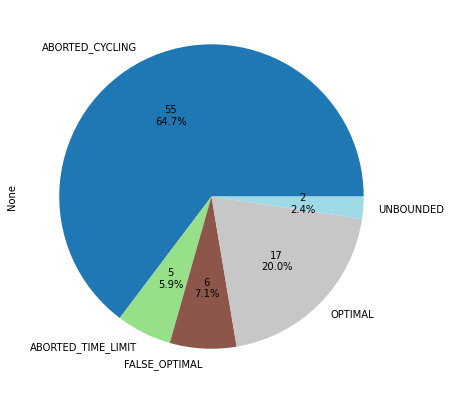

In [24]:
df_fo = df.copy()
_xst = ('Xplex', 'Status')
df_fo[_xst] =  df_fo[_xst].where(~df_xplex_optimal_mask | df_pstrue_opt, 'FALSE_OPTIMAL')
_ = df_fo.groupby(_xst).size().plot(kind='pie', autopct=lambda x: f'{x / 100 * len(df_fo):.0f}\n{x:.1f}%', figsize=(7, 7), colormap='tab20')